Probability mass function

In [1]:
import pandas as pd 
import numpy as np 
import random

In [2]:
L = []
for i in range(10000):
  L.append(random.randint(1,6))

In [3]:
len(L)

10000

In [4]:
L[:5]

[2, 3, 5, 1, 3]

In [5]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [6]:
s

1    0.1634
2    0.1640
3    0.1704
4    0.1639
5    0.1663
6    0.1720
dtype: float64

<Axes: >

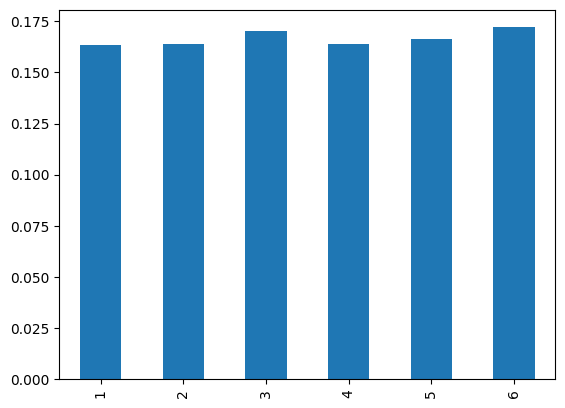

In [7]:
s.plot(kind='bar')

In [8]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)
  L.append(a+b)

In [9]:
len(L)

10000

In [10]:
L[:5]

[4, 4, 8, 9, 5]

In [11]:
a = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [12]:
a

2     0.0258
3     0.0564
4     0.0819
5     0.1127
6     0.1437
7     0.1737
8     0.1321
9     0.1095
10    0.0839
11    0.0563
12    0.0240
dtype: float64

<Axes: >

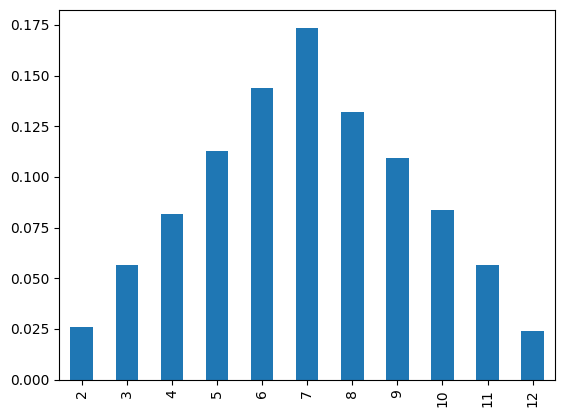

In [13]:
a.plot(kind='bar')

CDF of PMF

In [14]:
np.cumsum(a)

2     0.0258
3     0.0822
4     0.1641
5     0.2768
6     0.4205
7     0.5942
8     0.7263
9     0.8358
10    0.9197
11    0.9760
12    1.0000
dtype: float64

<Axes: >

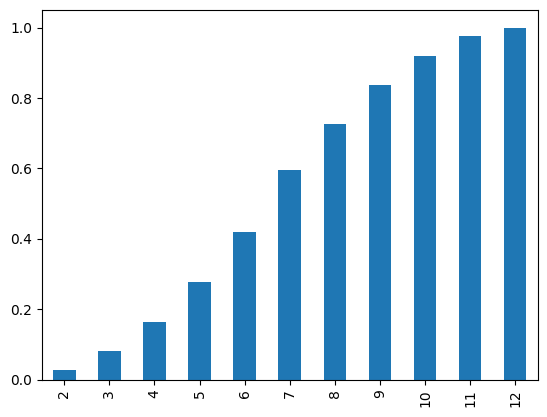

In [15]:
np.cumsum(a).plot(kind='bar')

In [16]:
np.cumsum(s)

1    0.1634
2    0.3274
3    0.4978
4    0.6617
5    0.8280
6    1.0000
dtype: float64

<Axes: >

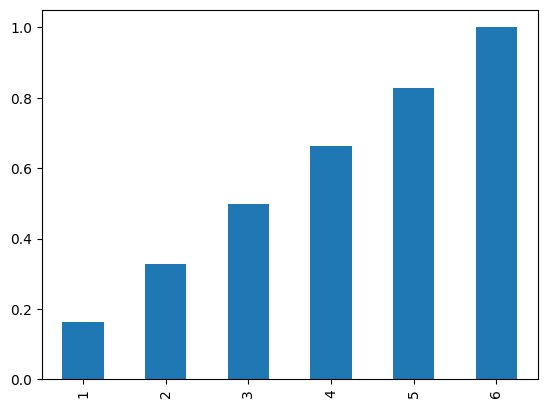

In [17]:
np.cumsum(s).plot(kind='bar')

Parametric Density Function

In [19]:
import matplotlib.pyplot as plt 
import numpy as np 
from numpy.random import normal

sample = normal(loc=50,scale=5,size=1000)
# loc = mean , scale = std -> population data

In [21]:
sample.shape

(1000,)

(array([  9.,  24.,  75., 169., 264., 238., 150.,  57.,  10.,   4.]),
 array([34.06062807, 37.29013852, 40.51964897, 43.74915942, 46.97866986,
        50.20818031, 53.43769076, 56.66720121, 59.89671166, 63.1262221 ,
        66.35573255]),
 <BarContainer object of 10 artists>)

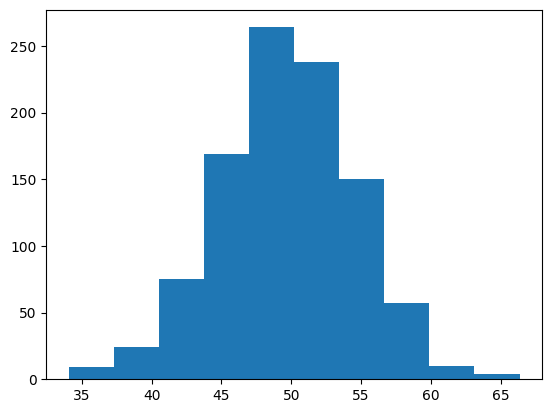

In [22]:
# Plot the histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [23]:
# Calculate the sample mean and sample distribution
sample_mean = sample.mean()
sample_std = sample.std()
print(sample_mean)
print(sample_std)

49.72954529597252
4.882115880171413


In [24]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean,sample_std)

In [25]:
values = np.linspace(sample.min(),sample.max(),100)

In [26]:
probabilities = [dist.pdf(value) for value in values]

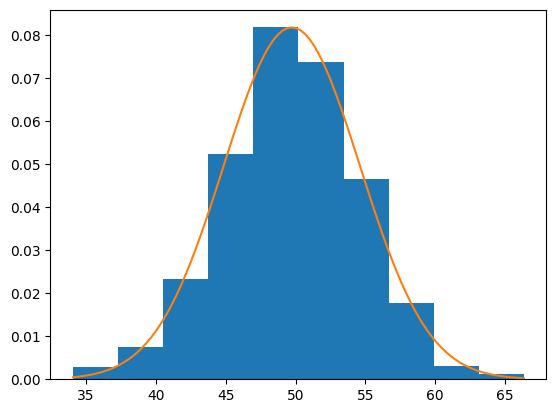

In [27]:
# plot the histogram and pdf 
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

<ipython-input-28-213893f2b8ef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

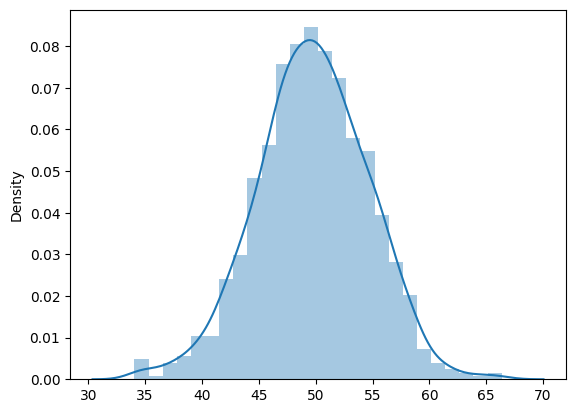

In [28]:
import seaborn as sns 
sns.distplot(sample)

KDE

In [29]:
# Generate a sample 
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=40,scale=5,size=700)
sample = np.hstack((sample1,sample2))

In [30]:
sample.shape

(1000,)

(array([ 2.,  2.,  4.,  5.,  4.,  7., 10., 17., 24., 16., 22., 22., 22.,
        21., 24., 19., 14., 13., 16., 12., 10., 14., 17.,  9., 17., 26.,
        27., 31., 44., 52., 45., 61., 56., 48., 46., 52., 50., 29., 23.,
        20., 16., 12.,  8.,  4.,  2.,  1.,  2.,  1.,  0.,  1.]),
 array([ 6.63312076,  7.65113158,  8.6691424 ,  9.68715322, 10.70516404,
        11.72317486, 12.74118568, 13.7591965 , 14.77720732, 15.79521814,
        16.81322896, 17.83123978, 18.8492506 , 19.86726142, 20.88527224,
        21.90328306, 22.92129388, 23.9393047 , 24.95731552, 25.97532634,
        26.99333716, 28.01134798, 29.0293588 , 30.04736962, 31.06538044,
        32.08339126, 33.10140208, 34.1194129 , 35.13742372, 36.15543454,
        37.17344536, 38.19145617, 39.20946699, 40.22747781, 41.24548863,
        42.26349945, 43.28151027, 44.29952109, 45.31753191, 46.33554273,
        47.35355355, 48.37156437, 49.38957519, 50.40758601, 51.42559683,
        52.44360765, 53.46161847, 54.47962929, 55.49764011,

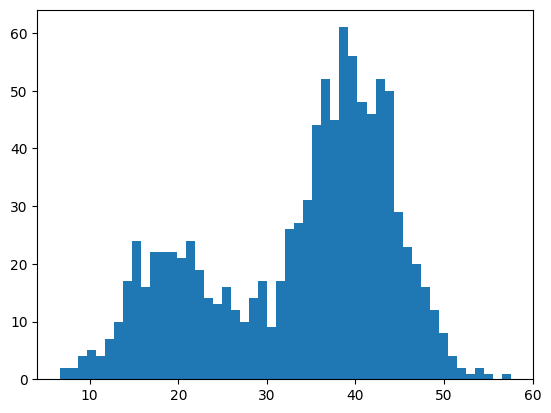

In [31]:
# plot histogram bins = 50
plt.hist(sample,bins=50)

In [32]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth = 3, kernel='gaussian')

# convert data to a 2D array 
sample = sample.reshape((len(sample),1))

model.fit(sample)

KernelDensity(bandwidth=3)

In [33]:
values = np.linspace(sample.min(),sample.max(),100)
values=values.reshape(len(values),1)

In [34]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

score sample (values) returns the log - density estimate of the input samples values .this is because the score_sample() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density. 

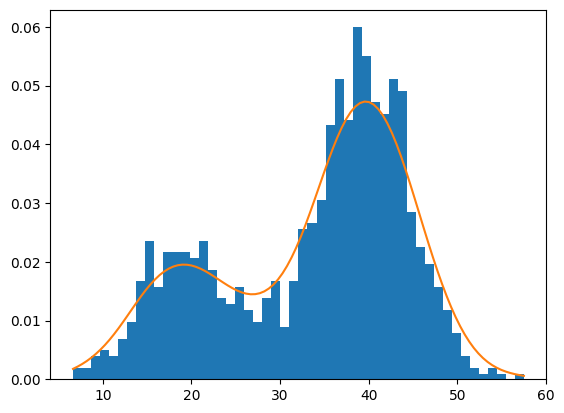

In [35]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)
plt.show()

<Axes: ylabel='Density'>

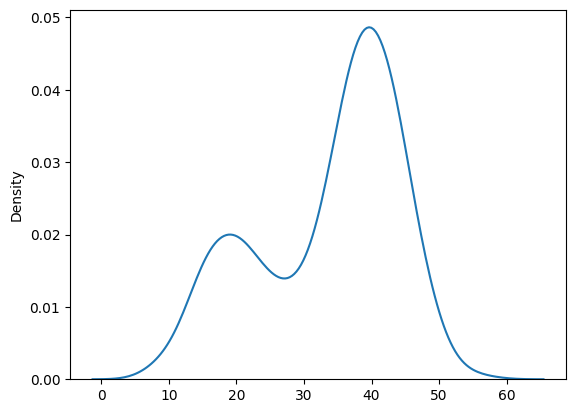

In [36]:
sns.kdeplot(sample.reshape(1000))

<Axes: ylabel='Density'>

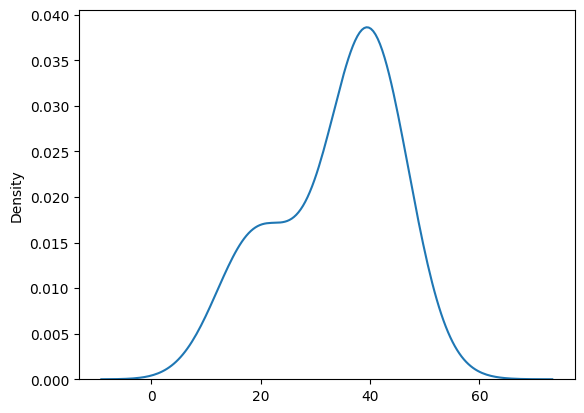

In [37]:
sns.kdeplot(sample.reshape(1000),bw_adjust=2)